## Implementácia aditívneho zdroja 

Implementácia zdroja pomocou striktne definovanej zložku poľa nie je optimálna, pretože uzol so zdrojom má charakter skratu a elektromagnetická energia sa cez takýto zdroj nešíri. Problém je možné riešiť aditívnym zdrojom elektromagnetického poľa, ktorý nebráni šíreniu sa energie. 

Pri odvodení môžeme vychádzať z Ampérovho zákona s prúdovou hustotou, ktorý má tvar

\begin{equation*}
\nabla \times \mathbf{H} = \mathbf{J} + \epsilon \frac{\partial \mathbf{E}}{\partial t}
\end{equation*}

Prúdová hustota reprezentuje pohyb nosičov náboja pod vplyvom elektrického poľa ako aj prúdy ktoré sú zviazané s inými zdrojmi v prostredí. Úpravou dostaneme

\begin{equation*}
\frac{\partial \mathbf{E}}{\partial t} = \frac{1}{\epsilon} \nabla \times \mathbf{H} - \frac{1}{\epsilon} \mathbf{J} 
\end{equation*}


Prevedením na do diferenčného tvaru a úpravou na aktualizačnú rovnicu dostaneme

\begin{equation}
E_z^{q+1}[m] = E_z^{q}[m] + \frac{\Delta t}{\epsilon \, \Delta x} \big({H_y^{q + 1/2}[m + 1/2] - H_y^{q+1/2}[m-1/2] } \big) - \frac{\Delta t}{ \epsilon} J_z^{q+1/2}[m]
\end{equation}

Aby sme nemuseli meniť implementáciu príkladu z predchádzajúcej kapitoly, rozložíme aktualizáciu na dva kroky

\begin{align}
E_z^{q+1}[m] &= E_z^{q}[m] + \frac{\Delta t}{\epsilon \, \Delta x} \big({H_y^{q + 1/2}[m + 1/2] - H_y^{q+1/2}[m-1/2] } \big) \\
E_z^{q+1}[m] &= E_z^{q}[m]  - \frac{\Delta t}{ \epsilon} J_z^{q+1/2}[m]
\end{align}

## Okrajové podmienky pre simuláciu neohraničeného prostredia

V predchádzajúcich príkladoch reprezentovali okrajové podmienky fiktívny ideálny elektrický (PEC) alebo magnetický (PMC) vodič, kde na hranici prostredia dochádzalo k odrazom. Pre simuláciu šírenia sa EM energie v priestore je vhodné pri konečnom počte uzlov podmienky zadefinovať tak, aby sme mohli pokladať prostredie za neohraničené, t.j. na hranici oblasti nedochádza k odrazom. V jednorozmernom prípade pri Courantovom čísle $S_c = 1$ je možné takéto podmienky definovať exaktne (ABC - Absorbing Boundary Condition), pre ostatné prípady je potrebná aproximácia.

ABC pre ľavý okraj odvodíme jednoduchou úvahou. Pretože vyžadujeme, aby sa energia šírila výhradne zprava doľava a zaroveň predpokladáme, že zvonka sa nebude do prostredia šíriť žiadna energia, musí sa po aktualizácii hodnota $E_z[0]$ rovnať hodnote $E_z[1]$ pred aktualizáciou, t.j

\begin{equation*}
E_z[0] = E_z[1]
\end{equation*}

podobne pre pravý okraj

\begin{equation*}
H_y[nodes-1] = H_y[nodes-2]
\end{equation*}

Uvedená forma okrajových podmienok platí len v jednoduchom jednorozmernom prípade a je zrejmé, že závisia od poradia výpočtu zložiek poľa v simulačnom kroku.  

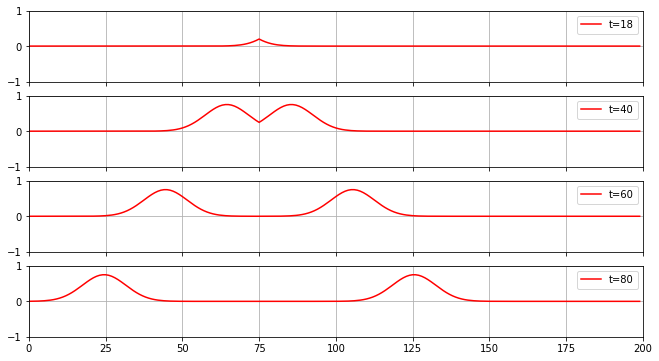

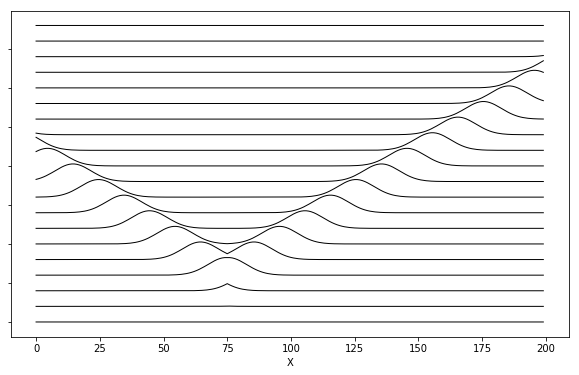

In [2]:
%reset -f 
%matplotlib inline
from scipy import *
from utils.utils import *
import matplotlib.pyplot as plt

nodes = 200
time = 200
ez = zeros(nodes)
hy = zeros(nodes)
z0 = 377.0

r = zeros((time, nodes))                             # pole vysledkov

for t in range(time):
    ez[0] = ez[1]
    for m in range(1,nodes):                         # 0...199
        ez[m] = ez[m] + (hy[m] - hy[m - 1]) * z0     # aktualizacia Ez
    ez[75] += exp(-(t - 30.)**2 / 100.)*1.5             # zdroj  
    
    hy[nodes-1] = hy[nodes-2]
    for m in range(nodes-1):                         # 0...198
        hy[m] = hy[m] + (ez[m + 1] - ez[m]) / z0     # aktualizacia Hy
        
    r[t,:] += ez

tm_plot([18, 40, 60, 80], r)
wv_plot(time, nodes, r)  